<a href="https://colab.research.google.com/github/duhyundev/TIL/blob/master/Kaggle_ML_and_Data_Science_Survey_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#참고 자료
- https://www.kaggle.com/rounakbanik/data-science-faq
- https://www.kaggle.com/ash316/novice-to-grandmaster
- https://programmers.co.kr/learn/courses/21/lessons/937

# 케글 사용자 설문조사
- 설문기간 : 2017.08.07 ~ 2017.08.25
- 평균 응답 시간 : 16.4 (m)
- 응답자 : 16,716 (명)
- 지역 : 171 (국가,지역) , 50명 미만인 경우 '기타'로 분류

## 기타사항
- 대부분의 응답자는 이메일 목록, 토론 포럼 및 소셜 미디어 Kaggle 채널을 통해 설문을 알게 됨.
- 신고대상자 혹은 취업 상태 질문에 답변하지 않은 응답자 제외
- 급여데이터는 일부 통화에 대해서만 받고, 해당 되는 통화에 기준하여 작성
- 미국 달러로 급여를 계산할 수 있도록 USD로 환산한 csv 제공
- 질문은 선택적
- 모든 질문이 모든 응답자에게 보여지는 것은 아님
- 취업을 한 사람과 학생을 나누어 다른 질문을 함
- 응답자의 신원을 보호하기 위해 주관식과 객관식 파일로 분리
- 개관식과 자유 형식 응답을 맞추기 위한 키를 제공하지 않음
- 주관식 응답은 같은 행에 나타나는 응답이 반드시 동일한 설문 조사자가 제공하지 않도록 열 단위로 무작위 지정 

# 데이터 파일
- schema.csv : 설문 스키마, multipleChoiceResponses.csv 및 freeformResponses.csv의 각 열 이름에 해당하는 질문 포함
- multipleChoiceResponses.csv : 객관식 및 순위 질문에 대한 응답자의 답변, 각 행이 한 응답자의 답변, 각 행이 한 응답자의 응답
- conversionRates.csv : R 패키지 "quantmod"에서 2017년 9월 14일에 액세스 한 통화 변환율 (USD)
- RespondentTypeREADME.txt : schema.csv 파일의 Asked 열에 응답을 디코딩하는 스키마



In [9]:
%cd drive/My Drive/Colab Notebooks

[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks'
/content/drive/My Drive/Colab Notebooks


In [97]:
pwd

'/content/drive/My Drive/Colab Notebooks'

In [0]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
question = pd.read_csv('kaggle-survey-2017/schema.csv')
question.shape

(290, 3)

In [12]:
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [13]:
mcr = pd.read_csv('kaggle-survey-2017/multipleChoiceResponses.csv', 
                  encoding='ISO-8859-1', 
                  low_memory=False)
mcr.shape

(16716, 228)

In [14]:
mcr.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [15]:
mcr.tail()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,...,WorkChallengeFrequencyITCoordination,WorkChallengeFrequencyHiringFunds,WorkChallengeFrequencyPrivacy,WorkChallengeFrequencyScaling,WorkChallengeFrequencyEnvironments,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,WorkChallengeFrequencyOtherSelect,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,WorkDatasets,WorkDatasetsChallenge,WorkDataStorage,WorkDataSharing,WorkDataSourcing,WorkCodeSharing,RemoteWork,CompensationAmount,CompensationCurrency,SalaryChange,JobSatisfaction,JobSearchResource,JobHuntTime,JobFactorLearning,JobFactorSalary,JobFactorOffice,JobFactorLanguages,JobFactorCommute,JobFactorManagement,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
16711,Female,Other,24.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16712,Male,Indonesia,25.0,Employed full-time,NaN,NaN,Yes,NaN,Programmer,Fine,Employed by a company that doesn't perform adv...,Jupyter notebooks,Bayesian Methods,Python,Dataset aggregator/platform (i.e. Socrata/Kagg...,"Kaggle,Non-Kaggle online communities,Online co...",NaN,NaN,NaN,NaN,NaN,NaN,Somewhat useful,NaN,Somewhat useful,NaN,Somewhat useful,NaN,NaN,Somewhat useful,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Sometimes,NaN,NaN,NaN,NaN,NaN,NaN,Less than 10% of projects,More internal than external,IT Department,NaN,NaN,"Key-value store (e.g. Redis/Riak),Row-oriented...","Email,Share Drive/SharePoint",NaN,Git,Rarely,NaN,IDR,I do not want to share information about my sa...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16713,Female,Taiwan,25.0,Employed part-time,NaN,NaN,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16714,Female,Singapore,16.0,I prefer not to say,Yes,"Yes, but data science is a small part of what ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16715,Male,Japan,27.0,Employed full-time,NaN,NaN,No,Yes,Programmer,Fine,Employed by professional services/consulting firm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

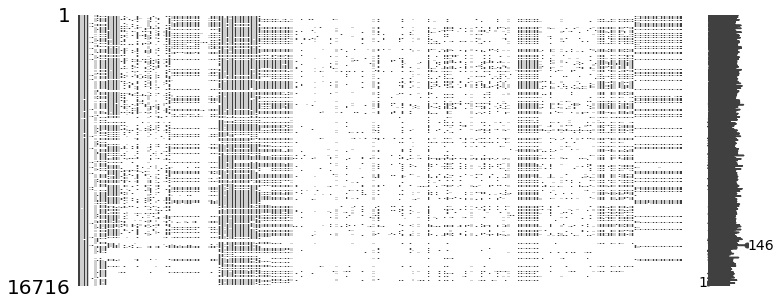

In [16]:
import missingno as mano

mano.matrix(mcr, figsize=(12,5));

- 16,716 명의 데이터와 228개의 선다형 객관식 문제와 62개의 주관식 질문에 대한 응답이다. (총 290개의 질의) 응답하지 않은 질문이 많음

# 설문통계

## 성별

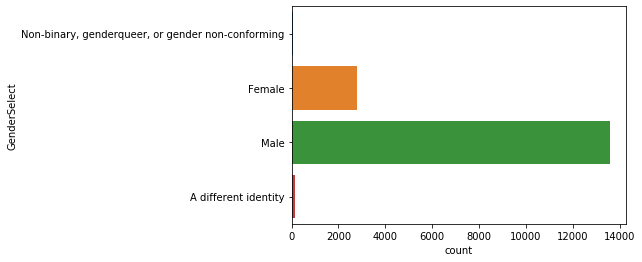

In [17]:
sns.countplot(y='GenderSelect', data=mcr)

## 국가/지역

In [18]:
con_df = pd.DataFrame(mcr['Country'].value_counts())
con_df['국가'] = con_df.index
con_df.columns = ['응답 수', '국가']

con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(5)

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom


## 나이

In [19]:
mcr['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

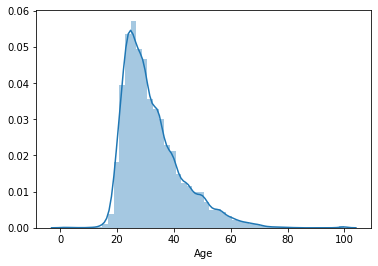

In [20]:
sns.distplot(mcr[mcr['Age'] > 0]['Age'])

응답자의 대부분이 20대와 30대이며, 30대가 가장 많고, 평균나이가 32세이다.

## 학력

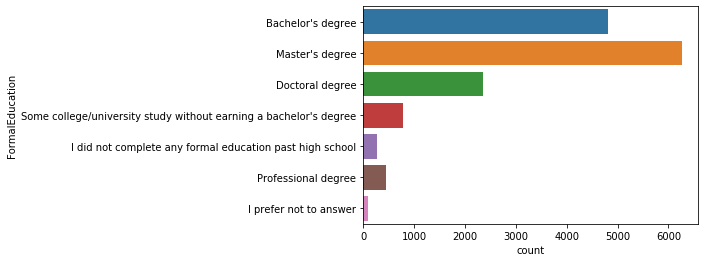

In [21]:
sns.countplot(y='FormalEducation', data=mcr)

- 학사 학위를 가진 사람보다 석사 학위를 가지고 있는 사람이 많고, 박사 학위를 가진 사람도 많았다.

In [22]:
mcr_major_count = pd.DataFrame(
    mcr['MajorSelect'].value_counts())
mcr_major_percent = pd.DataFrame(
    mcr['MajorSelect'].value_counts(normalize=True))
mcr_major_df = mcr_major_count.merge(
    mcr_major_percent, left_index=True, right_index=True)
mcr_major_df.columns = ['응답 수', '비율']
mcr_major_df

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


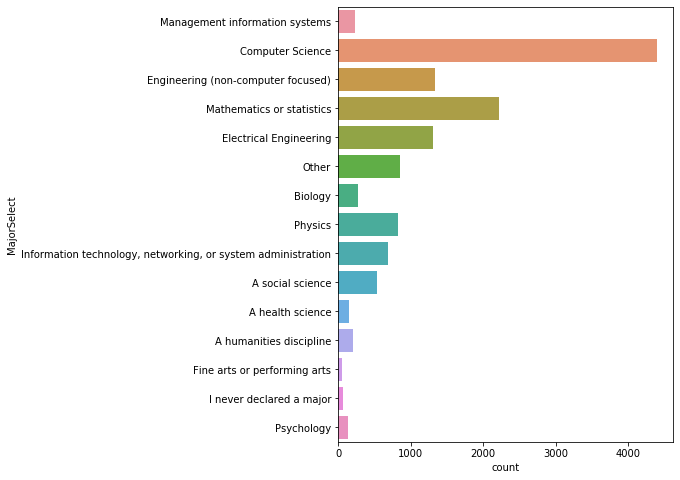

In [23]:
plt.figure(figsize=(6,8))
sns.countplot(y='MajorSelect', data=mcr)

## 취업 상태

In [24]:
mcr_es_count = pd.DataFrame(
    mcr['EmploymentStatus'].value_counts())
mcr_es_percent = pd.DataFrame(
    mcr['EmploymentStatus'].value_counts(normalize=True))
mcr_es_df = mcr_es_count.merge(
    mcr_es_percent, left_index=True, right_index=True)
mcr_es_df.columns = ['응답 수', '비율']
mcr_es_df

,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


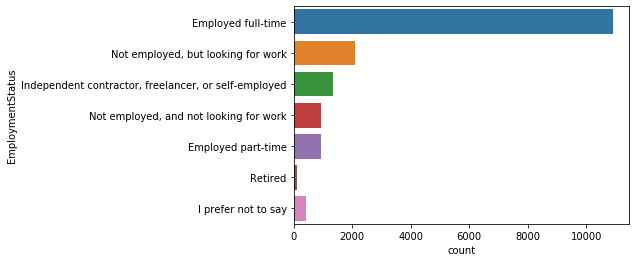

In [25]:
sns.countplot(y='EmploymentStatus', data=mcr)

## 프로그래밍 경험

- 'Tenure' 항목은 데이터 사이언스 분야에서 코딩 경험이 얼마나 되는지에 대한 질문이다. 대부분이 5년 미만이며, 특히 1~2년의 경험을 가진 사람들이 많다.

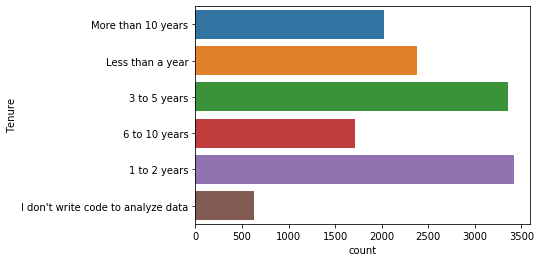

In [26]:
sns.countplot(y='Tenure', data=mcr)

## 한국

The number of interviewees in Korea : 194


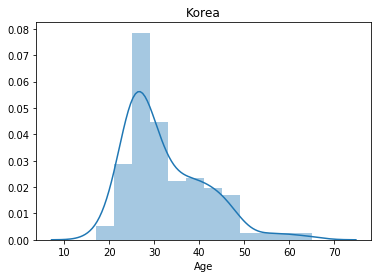

In [27]:
korea = mcr.loc[(mcr['Country']=='South Korea')]

print('The number of interviewees in Korea : ' + str(korea.shape[0]))

sns.distplot(korea['Age'].dropna())
plt.title('Korea')
plt.show()

### 성별

In [28]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5, 1.0, 'korean')

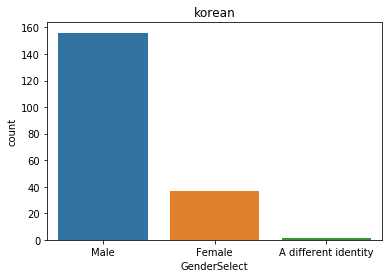

In [29]:
sns.countplot(x='GenderSelect', data=korea)
plt.title('korean')

### 나이별 성별

Text(0.5, 1.0, 'korean Male')

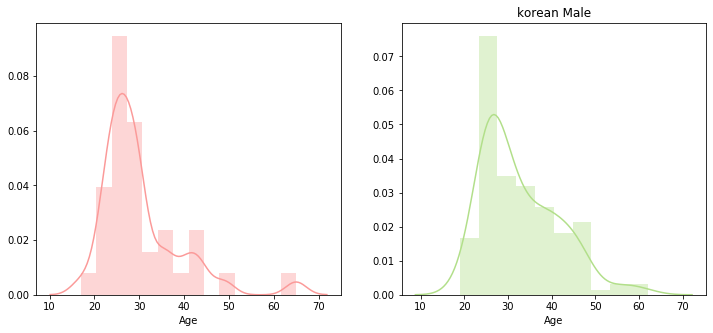

In [30]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(),
             norm_hist=False, color=sns.color_palette('Paired')[4], ax=ax1)
plt.title('korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(),
             norm_hist=False, color=sns.color_palette('Paired')[2], ax=ax2)
plt.title('korean Male')

### 취업 상태

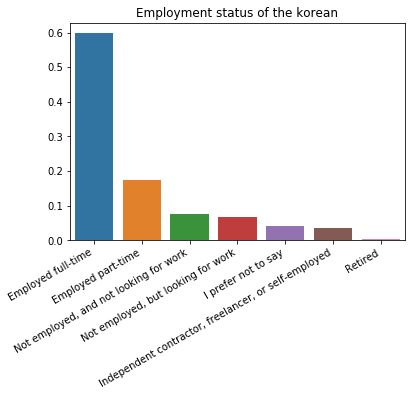

In [31]:
sns.barplot(x=korea['EmploymentStatus'].unique(), y=korea['EmploymentStatus'].value_counts()/len(korea))
plt.xticks(rotation=30, ha='right')
plt.title('Employment status of the korean')
plt.ylabel('')
plt.show()

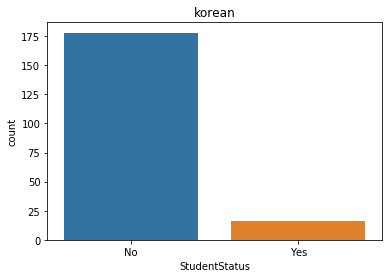

In [32]:
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(x='StudentStatus', data=korea)
plt.title('korean')
plt.show()

In [33]:
full_time = mcr.loc[(mcr['EmploymentStatus'] == 'Employed full-time')]
print(full_time.shape)
looking_for_job = mcr.loc[(
    mcr['EmploymentStatus'] == 'Not employed, but looking for work')]
print(looking_for_job.shape)

(10897, 228)
(2110, 228)


## 자주 묻는 질문 FAQ

### Q1. Python과 R 중 어떤 언어를 배워야 하나요?

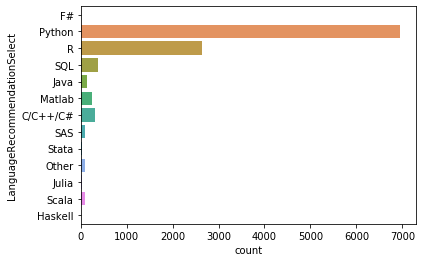

In [34]:
sns.countplot(y='LanguageRecommendationSelect', data=mcr)

(11830,)

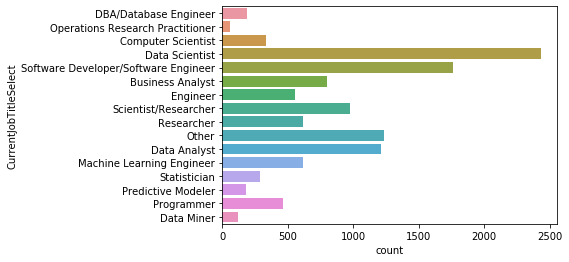

In [35]:
sns.countplot(y=mcr['CurrentJobTitleSelect'])
mcr[mcr['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape

(7158, 228)


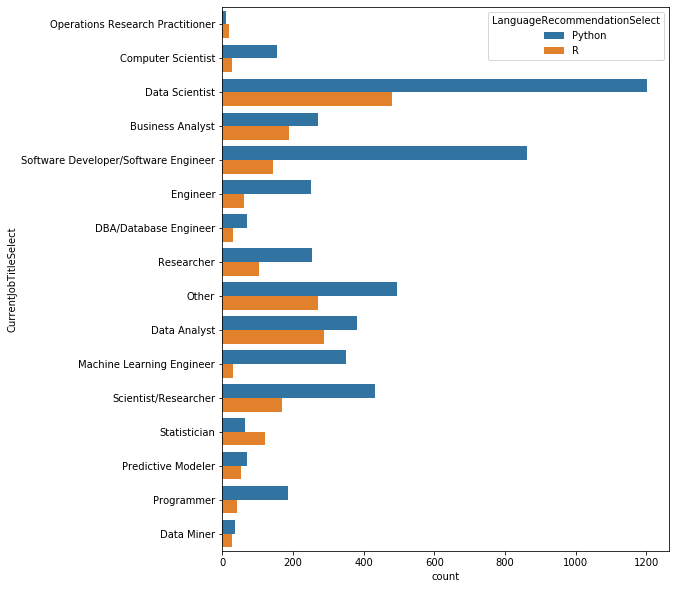

In [36]:
data = mcr[(mcr['CurrentJobTitleSelect'].notnull()) & (
           (mcr['LanguageRecommendationSelect'] == 'Python') | 
           (mcr['LanguageRecommendationSelect'] == 'R')
           )]
print(data.shape)
plt.figure(figsize=(8, 10))
sns.countplot(y='CurrentJobTitleSelect', hue='LanguageRecommendationSelect', data=data)

### Q2. 데이터 사이언스 분야에서 앞으로 크게 주목받을 것은 무엇일까요?

- 관련 분야의 종사자가 아니더라도, 빅데이터, 딥러닝, 뉴럴네크워크 같은 용어에 대해 알고 있다. 응답자들이 내년에 가장 흥미로운 기술이라될 것이라 응답한 것이다.

#### Data Science Tools

In [37]:
mcr_ml_tool_count = pd.DataFrame(
    mcr['MLToolNextYearSelect'].value_counts())
mcr_ml_tool_percent = pd.DataFrame(
    mcr['MLToolNextYearSelect'].value_counts(normalize=True)
)
mcr_ml_tool_df = mcr_ml_tool_count.merge(
    mcr_ml_tool_percent,
    left_index=True,
    right_index=True
).head(20)
mcr_ml_tool_df.columns = ['응답 수', '비율']
mcr_ml_tool_df

,응답 수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


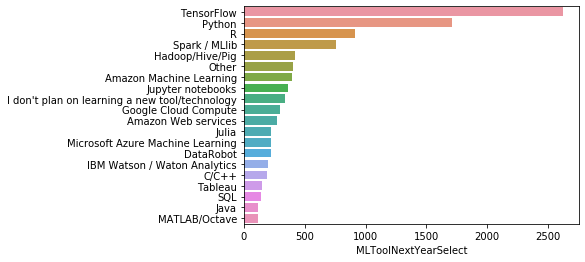

In [38]:
data = mcr['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y=data.index, x=data)

#### Data Science Method

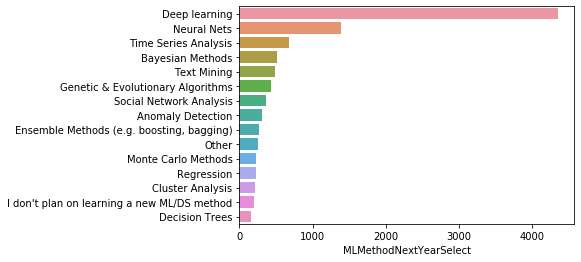

In [39]:
data = mcr['MLMethodNextYearSelect'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

### Q3. 어디에서 데이터 사이언스를 배워야 할까요?

In [0]:
mcr['LearningPlatformSelect'] = mcr['LearningPlatformSelect'].astype('str').apply(lambda x : x.split(','))
s = mcr.apply(
    lambda x: pd.Series(x['LearningPlatformSelect']), axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platform'


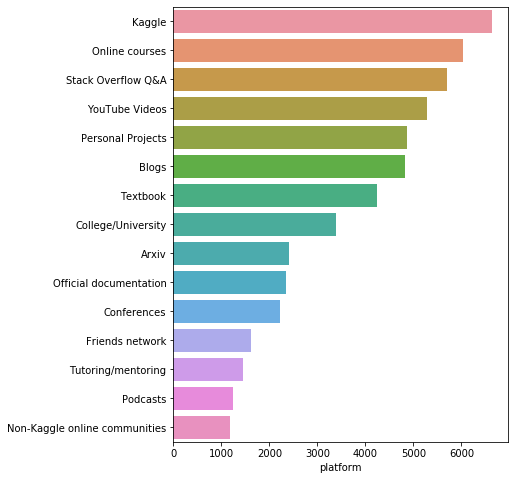

In [41]:
plt.figure(figsize=(6,8))
data = s[s != 'nan'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

In [42]:
qc = question.loc[question['Column'].str.contains('LearningCategory')]
print(qc.shape)
qc

(7, 3)


,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


In [0]:
use_features = [x for x in mcr.columns if x.find('LearningPlatformUsefulness') != -1]

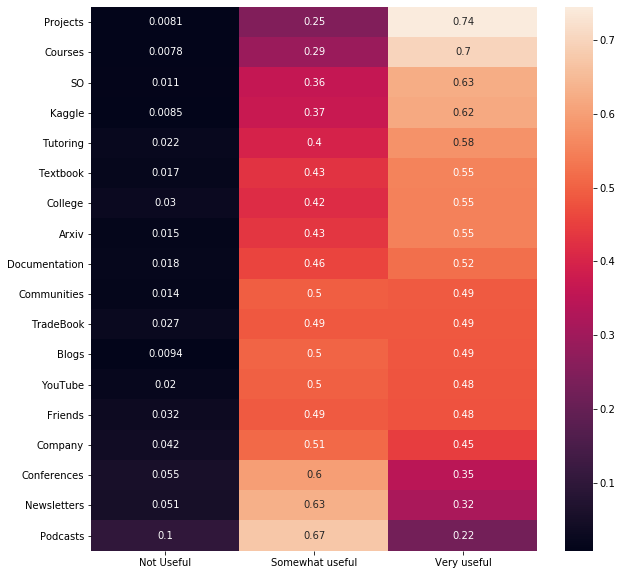

In [44]:
fdf = {}
for feature in use_features:
  a = mcr[feature].value_counts()
  a = a/a.sum()
  fdf[feature[len('LearningPlatformUsefulness'):]] = a

fdf = pd.DataFrame(fdf).transpose().sort_values(
    'Very useful', ascending=False)

plt.figure(figsize=(10,10))
sns.heatmap(
    fdf.sort_values(
        'Very useful', ascending=False), annot=True)

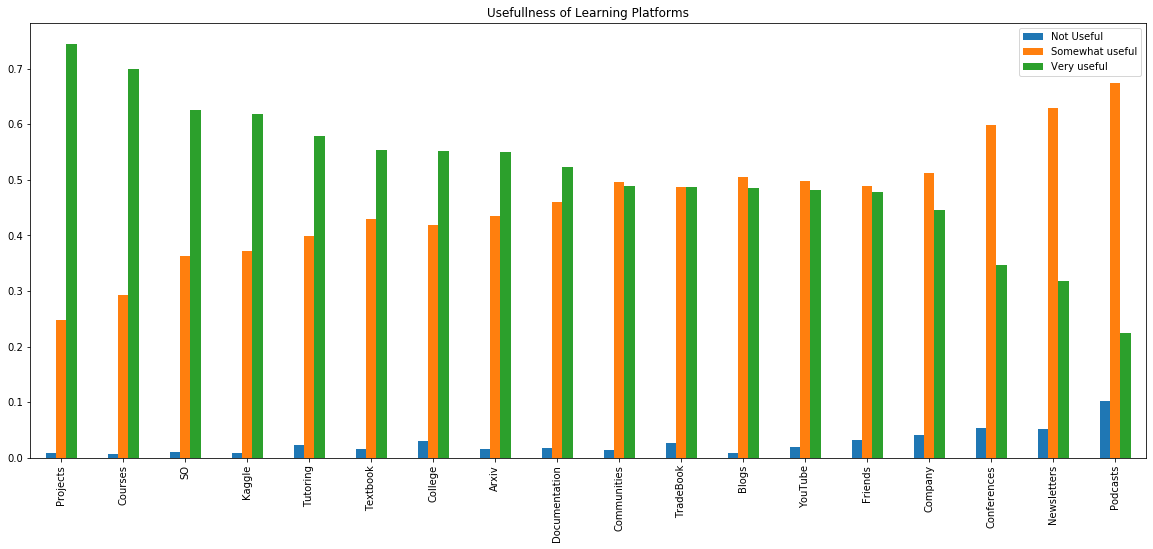

In [45]:
fdf.plot(kind='bar', figsize=(20,8),
         title="Usefullness of Learning Platforms")

In [46]:
cat_features = [x for x in mcr.columns if x.find(
    'LearningCategory') != -1]
cat_features

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

In [47]:
cdf = {}
for feature in cat_features:
  cdf[feature[len('LearningCategory'):]] = mcr[feature].mean()

cdf = pd.Series(cdf)
cdf

SelftTaught      33.366771
OnlineCourses    27.375514
Work             15.217593
University       16.988607
Kaggle            5.531434
Other             1.795940
dtype: float64

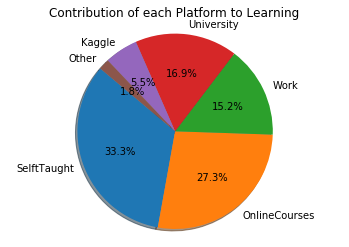

In [48]:
plt.pie(cdf, labels=cdf.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Contribution of each Platform to Learning")
plt.show()

### Q4. 데이터과학을 위해 높은 사양의 컴퓨터가 필요한가요?

In [49]:
qc = question.loc[question['Column'].str.contains('HardwarePersonalProjectsSelect')]
print(qc.shape)
qc

(1, 3)


,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


In [50]:
mcr[mcr['HardwarePersonalProjectsSelect'].notnull()]['HardwarePersonalProjectsSelect'].shape

(4206,)

In [0]:
mcr['HardwarePersonalProjectsSelect'
    ] = mcr['HardwarePersonalProjectsSelect'].astype('str').apply(lambda x: x.split(','))

s = mcr.apply(lambda x: pd.Series(x['HardwarePersonalProjectsSelect']),
              axis=1).stack().reset_index(level=1, drop=True)
s.name = 'hardware'

In [0]:
s = s[s != 'nan']

In [53]:
pd.DataFrame(s.value_counts())

,hardware
Basic laptop (Macbook),2246
GCE ...),669
Laptop + Cloud service (AWS,669
Azure,669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174
Other,147


### Q5. 데이터 사이언스 공부에 얼마나 많은 시간을 사용하는가?

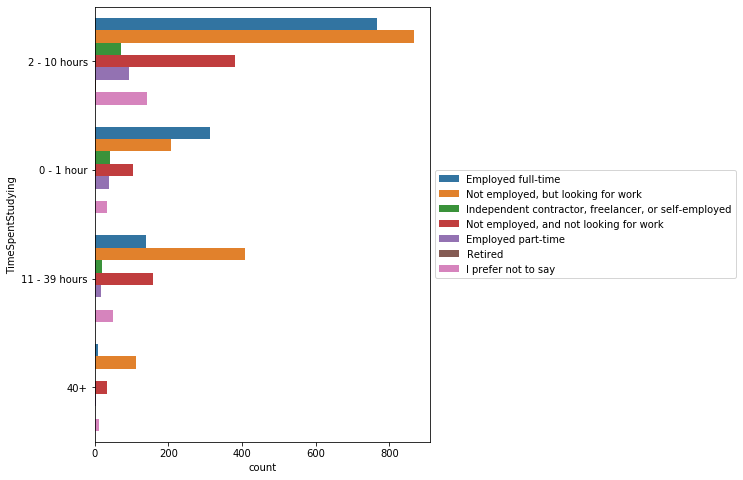

In [54]:
plt.figure(figsize=(6,8))
sns.countplot(y='TimeSpentStudying',
              data=mcr,
              hue='EmploymentStatus').legend(loc='center left',
                                             bbox_to_anchor=(1, 0.5))

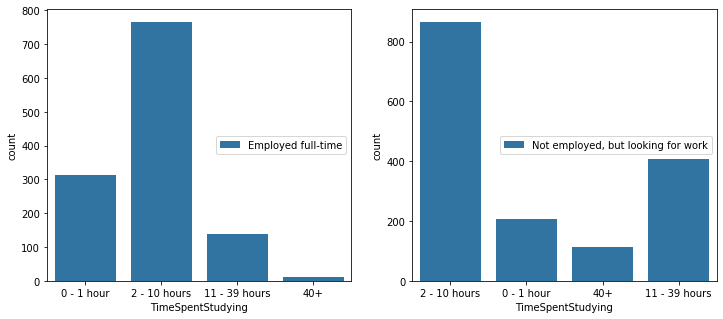

In [55]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.countplot(x='TimeSpentStudying',
              data=full_time,
              hue='EmploymentStatus', ax=ax1
              ).legend(loc='center right',
                       bbox_to_anchor=(1, 0.5))

sns.countplot(x='TimeSpentStudying',
              data=looking_for_job,
              hue='EmploymentStatus', ax=ax2
              ).legend(loc='center right',
                       bbox_to_anchor=(1, 0.5))

### Q6. 블로그, 팟캐스트, 수업, 기타 등등 추천할 것들이 있는가?

In [56]:
mcr['BlogsPodcastsNewslettersSelect'] = mcr[
  'BlogsPodcastsNewslettersSelect'].astype('str').apply(lambda x: x.split(','))
mcr['BlogsPodcastsNewslettersSelect'].head()

0    [Becoming a Data Scientist Podcast, Data Machi...
1    [Becoming a Data Scientist Podcast, Siraj Rava...
2    [FastML Blog, No Free Hunch Blog, Talking Mach...
3                                     [KDnuggets Blog]
4    [Data Machina Newsletter, Jack's Import AI New...
Name: BlogsPodcastsNewslettersSelect, dtype: object

In [57]:
s = mcr.apply(lambda x: pd.Series(x['BlogsPodcastsNewslettersSelect']),
  axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platforms'
s.head()

0    Becoming a Data Scientist Podcast
0              Data Machina Newsletter
0             O'Reilly Data Newsletter
0         Partially Derivative Podcast
0           R Bloggers Blog Aggregator
Name: platforms, dtype: object

In [0]:
s = s[s != 'nan'].value_counts().head(20)

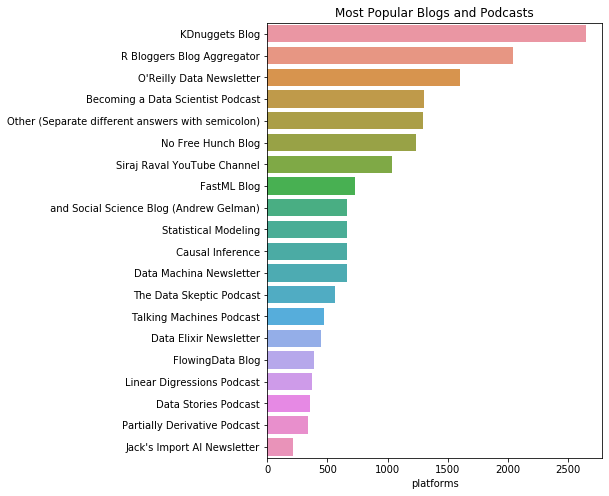

In [59]:
plt.figure(figsize=(6,8))
plt.title("Most Popular Blogs and Podcasts")
sns.barplot(y=s.index, x=s)

- [Machine Learning, Data Science, Big Data, Analytics](https://www.kdnuggets.com/)

- [Becoming a Data Scientist - YouTube - YouTube](https://www.youtube.com/channel/UCfxnrdBM1YRV9j2MB8aiy4Q)

- [Siraj Raval - YouTube - YouTube](https://www.youtube.com/channel/UCWN3xxRkmTPmbKwht9FuE5A)

In [60]:
mcr['CoursePlatformSelect'] = mcr[
  'CoursePlatformSelect'].astype(
      'str').apply(lambda x: x.split(','))
mcr['CoursePlatformSelect'].head()

0              [nan]
1              [nan]
2    [Coursera, edX]
3              [nan]
4              [nan]
Name: CoursePlatformSelect, dtype: object

In [61]:
t = mcr.apply(lambda x: pd.Series(x['CoursePlatformSelect']),
              axis=1).stack().reset_index(level=1, drop=True)
t.name = 'courses'
t.head(20)

0          nan
1          nan
2     Coursera
2          edX
3          nan
4          nan
5          nan
6          nan
7     Coursera
8          nan
9          nan
10    Coursera
11         nan
12    Coursera
12    DataCamp
12         edX
13         nan
14         nan
15         nan
16         nan
Name: courses, dtype: object

In [0]:
t = t[t != 'nan'].value_counts()

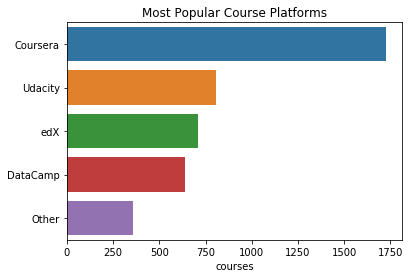

In [63]:
plt.title("Most Popular Course Platforms")
sns.barplot(y=t.index, x=t)

### Q7. 데이터 사이언스 직무에서 가장 중요하다고 생각되는 스킬은 무엇인가?

In [64]:
job_features = [
 x for x in mcr.columns if x.find(
 'JobSkillImportance') != -1
 and x.find('JobSkillImportanceOther') == -1]

job_features

['JobSkillImportanceBigData',
 'JobSkillImportanceDegree',
 'JobSkillImportanceStats',
 'JobSkillImportanceEnterpriseTools',
 'JobSkillImportancePython',
 'JobSkillImportanceR',
 'JobSkillImportanceSQL',
 'JobSkillImportanceKaggleRanking',
 'JobSkillImportanceMOOC',
 'JobSkillImportanceVisualizations']

In [65]:
jdf = {}
for feature in job_features:
 a = mcr[feature].value_counts()
 a = a/a.sum()
 jdf[feature[len('JobSkillImportance'):]] = a

jdf

{'BigData': Nice to have    0.574065
 Necessary       0.379929
 Unnecessary     0.046006
 Name: JobSkillImportanceBigData, dtype: float64,
 'Degree': Nice to have    0.598107
 Necessary       0.279867
 Unnecessary     0.122026
 Name: JobSkillImportanceDegree, dtype: float64,
 'EnterpriseTools': Nice to have    0.564970
 Unnecessary     0.290200
 Necessary       0.144829
 Name: JobSkillImportanceEnterpriseTools, dtype: float64,
 'KaggleRanking': Nice to have    0.677261
 Unnecessary     0.203876
 Necessary       0.118863
 Name: JobSkillImportanceKaggleRanking, dtype: float64,
 'MOOC': Nice to have    0.606994
 Unnecessary     0.285752
 Necessary       0.107255
 Name: JobSkillImportanceMOOC, dtype: float64,
 'Python': Necessary       0.645994
 Nice to have    0.327214
 Unnecessary     0.026792
 Name: JobSkillImportancePython, dtype: float64,
 'R': Nice to have    0.513945
 Necessary       0.414807
 Unnecessary     0.071247
 Name: JobSkillImportanceR, dtype: float64,
 'SQL': Nice to have 

In [66]:
jdf = pd.DataFrame(jdf).transpose()
jdf

,Necessary,Nice to have,Unnecessary
BigData,0.379929,0.574065,0.046006
Degree,0.279867,0.598107,0.122026
Stats,0.513889,0.457576,0.028535
EnterpriseTools,0.144829,0.564970,0.290200
Python,0.645994,0.327214,0.026792
R,0.414807,0.513945,0.071247
SQL,0.434224,0.491778,0.073998
KaggleRanking,0.118863,0.677261,0.203876
MOOC,0.107255,0.606994,0.285752
Visualizations,0.455392,0.490820,0.053788


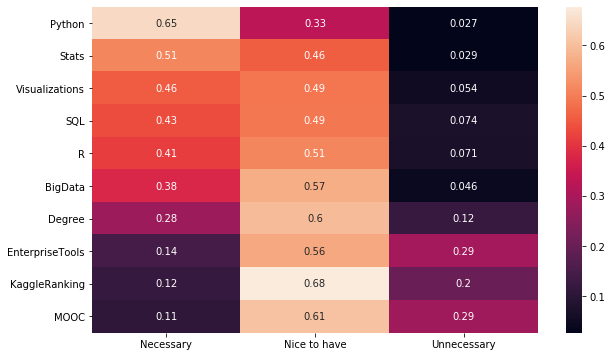

In [67]:
plt.figure(figsize=(10,6))
sns.heatmap(jdf.sort_values("Necessary",
 ascending=False), annot=True)

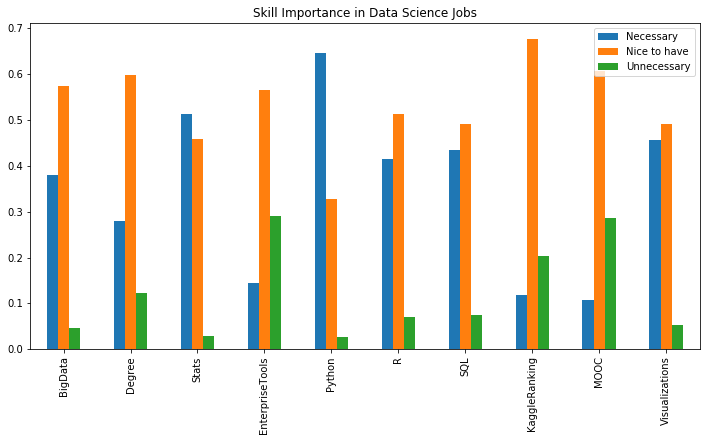

In [68]:
jdf.plot(kind='bar', figsize=(12,6),
 title="Skill Importance in Data Science Jobs")

### Q8. 데이터 과학자의 평균 급여는 얼마나 되나?

In [69]:
mcr[mcr['CompensationAmount'].notnull()].shape

(5224, 228)

In [0]:
mcr['CompensationAmount'] = mcr[
 'CompensationAmount'].str.replace(',','')
mcr['CompensationAmount'] = mcr[
 'CompensationAmount'].str.replace('-','')

In [71]:
rates = pd.read_csv('kaggle-survey-2017/conversionRates.csv')
rates.drop('Unnamed: 0',axis=1,inplace=True)

salary = mcr[
 ['CompensationAmount','CompensationCurrency',
 'GenderSelect',
 'Country',
 'CurrentJobTitleSelect']].dropna()
salary = salary.merge(rates,left_on='CompensationCurrency',
 right_on='originCountry', how='left')
salary['Salary'] = pd.to_numeric(
 salary['CompensationAmount']) * salary['exchangeRate']
salary.head()

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
0,250000,USD,Male,United States,Operations Research Practitioner,USD,1.000000,250000.0
1,80000,AUD,Female,Australia,Business Analyst,AUD,0.802310,64184.8
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402,20882.4
3,95000,INR,Male,India,Data Scientist,INR,0.015620,1483.9
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304,36634.4


In [72]:
print('Maximum Salary is USD $',
 salary['Salary'].dropna().astype(int).max())
print('Minimum Salary is USD $',
 salary['Salary'].dropna().astype(int).min())
print('Median Salary is USD $',
 salary['Salary'].dropna().astype(int).median())

Maximum Salary is USD $ 28297400000
Minimum Salary is USD $ 0
Median Salary is USD $ 53812.0


#### 급여 분포

Text(0.5, 1.0, 'Salary Distribution')

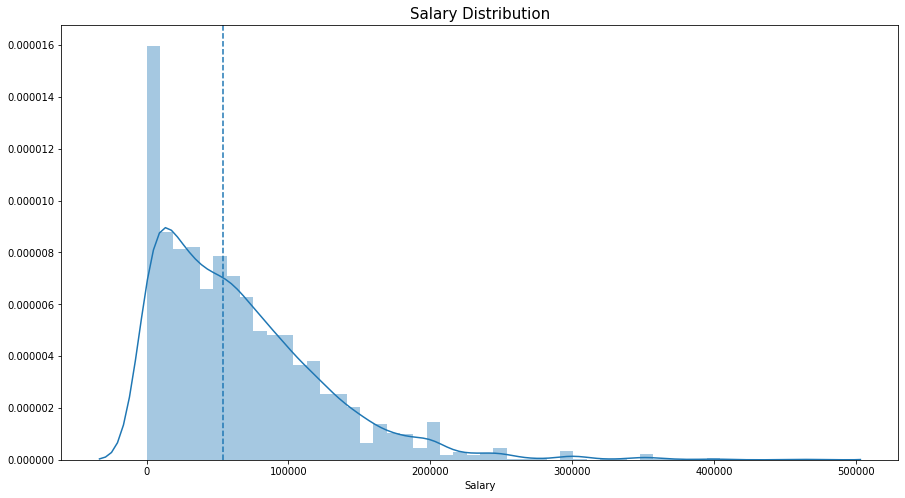

In [73]:
plt.subplots(figsize=(15,8))
salary=salary[salary['Salary']<500000]
sns.distplot(salary['Salary'])
plt.axvline(salary['Salary'].median(), linestyle='dashed')
plt.title('Salary Distribution',size=15)

#### 국가별 급여 중간값

Text(0.5, 1.0, 'Highest Salary Paying Countries')

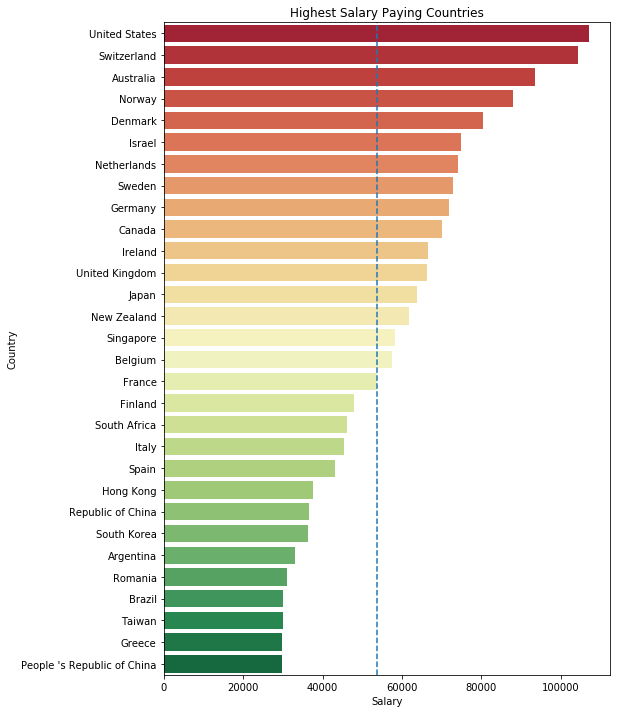

In [74]:
plt.subplots(figsize=(8,12))

sal_coun = salary.groupby(
 'Country')['Salary'].median().sort_values(
 ascending=False)[:30].to_frame()

sns.barplot('Salary',
 sal_coun.index,
 data = sal_coun,
 palette='RdYlGn')

plt.axvline(salary['Salary'].median(), linestyle='dashed')
plt.title('Highest Salary Paying Countries')


#### 성별 급여 차이

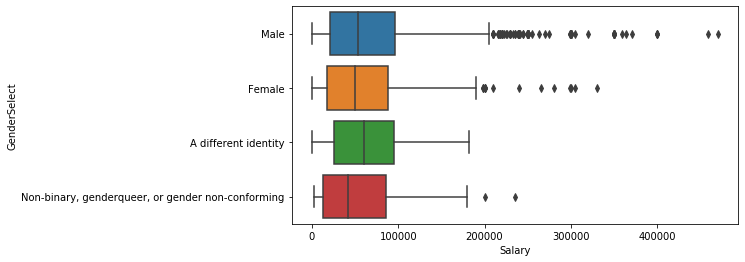

In [75]:
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect',x='Salary', data=salary)

#### 한국 급여

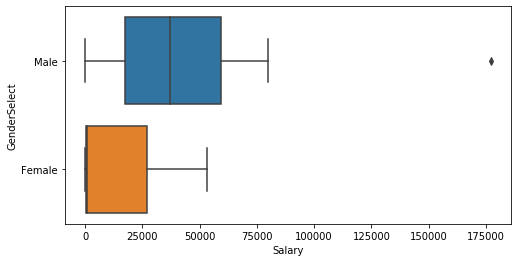

In [76]:
salary_korea = salary.loc[(salary['Country']=='South Korea')]
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect',x='Salary',data=salary_korea)

In [77]:
salary_korea.shape

(26, 8)

##### 성별 급여 차이

In [78]:
salary_korea[salary_korea['GenderSelect'] == 'Female']

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
479,30000,KRW,Female,South Korea,Data Analyst,KRW,0.000886,26.58
2903,800000,KRW,Female,South Korea,Researcher,KRW,0.000886,708.80
4063,60000000,KRW,Female,South Korea,Researcher,KRW,0.000886,53160.00


In [79]:
salary_korea_male = salary_korea[
 salary_korea['GenderSelect']== 'Male']
salary_korea_male['Salary'].describe()

count        23.000000
mean      43540.617217
std       37800.608484
min           0.886000
25%       17500.000000
50%       37212.000000
75%       59238.000000
max      177200.000000
Name: Salary, dtype: float64

In [80]:
salary_korea_male

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
85,40000000,KRW,Male,South Korea,Business Analyst,KRW,0.000886,35440.000
147,80000,USD,Male,South Korea,Researcher,USD,1.000000,80000.000
314,60000,USD,Male,South Korea,Business Analyst,USD,1.000000,60000.000
333,60000000,KRW,Male,South Korea,Researcher,KRW,0.000886,53160.000
562,50000000,KRW,Male,South Korea,Researcher,KRW,0.000886,44300.000
769,42000000,KRW,Male,South Korea,Software Developer/Software Engineer,KRW,0.000886,37212.000
799,1000,KRW,Male,South Korea,Machine Learning Engineer,KRW,0.000886,0.886
1060,75000000,KRW,Male,South Korea,Scientist/Researcher,KRW,0.000886,66450.000
1360,30000000,KRW,Male,South Korea,Statistician,KRW,0.000886,26580.000
1568,90000,SGD,Male,South Korea,Computer Scientist,SGD,0.742589,66833.010


### Q9. 개인 프로젝트나 학습용 데이터를 어디에서 얻나?

In [0]:
mcr['PublicDatasetsSelect'] = mcr[
 'PublicDatasetsSelect'].astype('str').apply(
 lambda x: x.split(',')
 )

In [0]:
q = mcr.apply(
 lambda x: pd.Series(x['PublicDatasetsSelect']),
 axis=1).stack().reset_index(level=1, drop=True)

q.name = 'courses'

In [0]:
q = q[q != 'nan'].value_counts()

In [84]:
pd.DataFrame(q)

,courses
Dataset aggregator/platform (i.e. Socrata/Kaggle Datasets/data.world/etc.),6843
Google Search,3600
University/Non-profit research group websites,2873
I collect my own data (e.g. web-scraping),2560
GitHub,2400
Government website,2079
Other,399


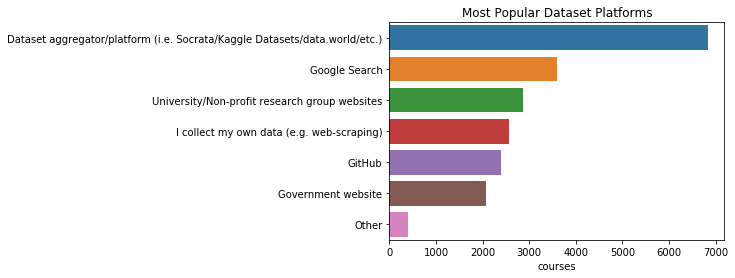

In [85]:
plt.title("Most Popular Dataset Platforms")
sns.barplot(y=q.index, x=q)

### Q10. 개인 프로젝트에서 공개된 데이터셋을 다루는데 가장 어려운 점은 무엇인가?

In [86]:
ff = pd.read_csv('kaggle-survey-2017/freeformResponses.csv',
 encoding="ISO-8859-1", low_memory=False)
ff.shape

(16716, 62)

In [87]:
qc = question.loc[question[
 'Column'].str.contains('PersonalProjectsChallengeFreeForm')]
print(qc.shape)
qc.Question.values[0]

(1, 3)


'What is your biggest challenge with the public datasets you find for personal projects?'

In [88]:
ppcff = ff[
 'PersonalProjectsChallengeFreeForm'].value_counts().head(15)
ppcff.name = '응답 수'
pd.DataFrame(ppcff)

,응답 수
None,23
Cleaning the data,20
Cleaning,20
Dirty data,16
Data Cleaning,14
none,13
dirty data,10
Data cleaning,10
-,9
Size,9


### Q11. 데이터 사이언스 업무에서 가장 많은 시간을 필요로 하는일은 무엇인가?

In [0]:
time_features = [
  x for x in mcr.columns if x.find('Time') != -1][4:10]

GatheringData      36.144754
ModelBuilding      21.268066
Production         10.806372
Visualizing        13.869372
FindingInsights    13.094776
OtherSelect         2.396247
dtype: float64


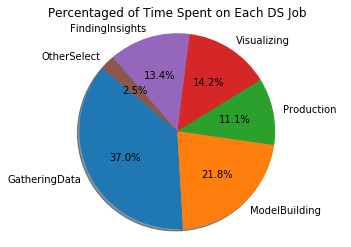

In [90]:
tdf = {}
for feature in time_features:
  tdf[feature[len('Time'):]] = mcr[feature].mean()

tdf = pd.Series(tdf)
print(tdf)

plt.pie(tdf, labels=tdf.index,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentaged of Time Spent on Each DS Job")
plt.show();

### Q12. 데이터사이언스 직업을 찾는데 가장 고려해야할 요소는 무엇인가?

In [91]:
qc = question.loc[question[
 'Column'].str.contains('JobFactor')]
print(qc.shape)
qc.Question.values

(16, 3)


array(['How are you assessing potential job opportunities? - Opportunities for professional development',
       'How are you assessing potential job opportunities? - The compensation and benefits offered',
       "How are you assessing potential job opportunities? - The office environment I'd be working in",
       "How are you assessing potential job opportunities? - The languages, frameworks, and other technologies I'd be working with",
       "How are you assessing potential job opportunities? - The amount of time I'd have to spend commuting",
       'How are you assessing potential job opportunities? - How projects are managed at the company or organization',
       'How are you assessing potential job opportunities? - The experience level called for in the job description',
       "How are you assessing potential job opportunities? - The specific department or team I'd be working on",
       "How are you assessing potential job opportunities? - The specific role or job title I'd 

In [0]:
job_factors = [
    x for x in mcr.columns if x.find('JobFactor') != -1]

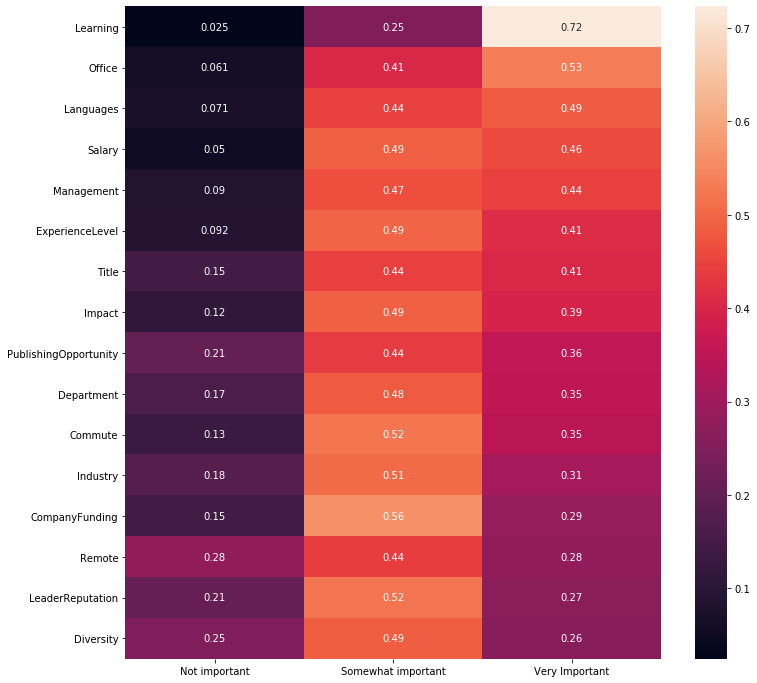

In [93]:
jfdf = {}
for feature in job_factors:
    a = mcr[feature].value_counts()
    a = a/a.sum()
    jfdf[feature[len('JobFactor'):]] = a

jfdf = pd.DataFrame(jfdf).transpose()

plt.figure(figsize=(12,12))
sns.heatmap(jfdf.sort_values('Very Important', 
                             ascending=False), annot=True)

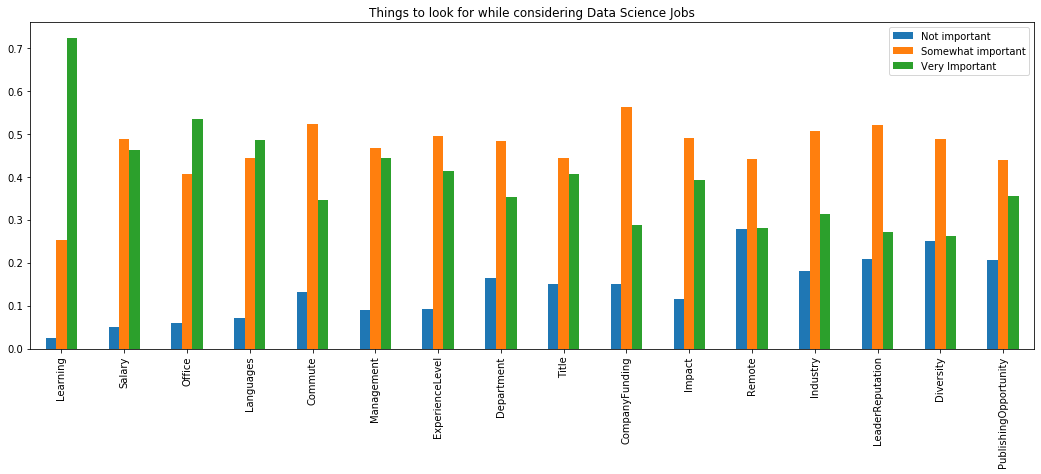

In [94]:
jfdf.plot(kind='bar', figsize=(18,6), 
          title="Things to look for while considering Data Science Jobs")
plt.show()

### Q13. 데이터 사이언티스트가 되기 위해 학위가 중요할까?

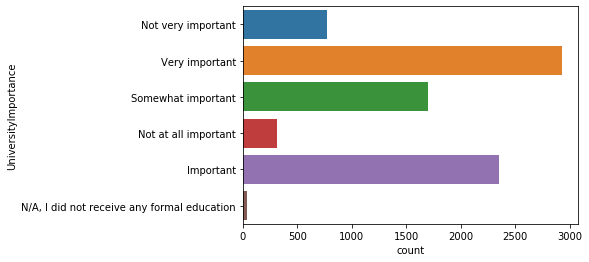

In [95]:
sns.countplot(y='UniversityImportance', data=mcr)

In [99]:
import plotly.figure_factory as ff

top_uni = mcr['UniversityImportance'].value_counts().head(5)
top_uni_dist = []
for uni in top_uni.index:
    top_uni_dist.append(
        mcr[(mcr['Age'].notnull()) & \
            (mcr['UniversityImportance'] == uni)]['Age'])

group_labels = top_uni.index

fig = ff.create_distplot(
    top_uni_dist, group_labels, show_hist=False)
fig.show()

### Q14. 어디에서부터 데이터사이언스를 시작해야 할까?

In [100]:
mcr[mcr['FirstTrainingSelect'].notnull()].shape

(14712, 228)

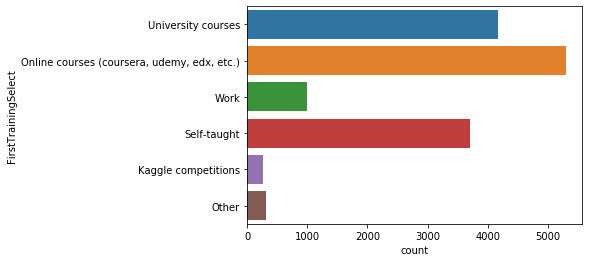

In [101]:
sns.countplot(y='FirstTrainingSelect', data=mcr)

### Q15. 데이터사이언티스트 이력서에서 가장 중요한 것은 무엇인가?

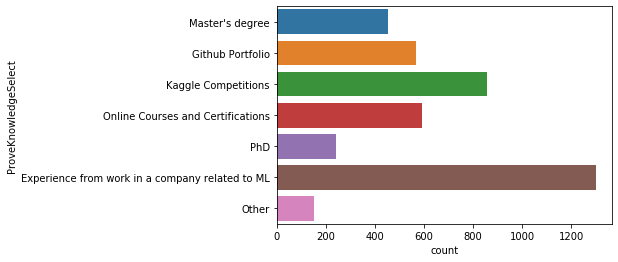

In [102]:
sns.countplot(y='ProveKnowledgeSelect', data=mcr)

### Q16. 머신러닝 알고리즘을 사용하기 위해 수학이 필요할까?

In [103]:
qc = question.loc[question[
    'Column'].str.contains('AlgorithmUnderstandingLevel')]
qc

,Column,Question,Asked
227,AlgorithmUnderstandingLevel,At which level do you understand the mathemati...,CodingWorker


In [104]:
mcr[mcr['AlgorithmUnderstandingLevel'].notnull()].shape

(7410, 228)

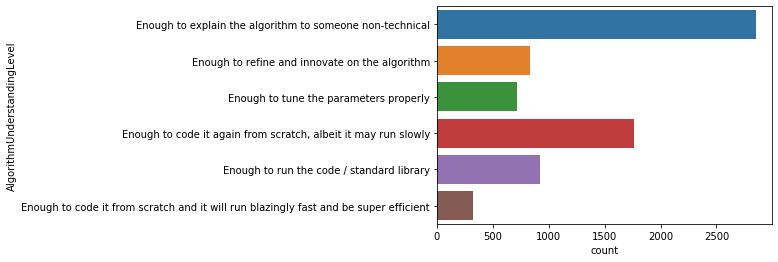

In [105]:
sns.countplot(y='AlgorithmUnderstandingLevel', data=mcr)

### Q17. 어디에서 일을 찾아야할까?

In [106]:
question.loc[question[
    'Column'].str.contains(
    'JobSearchResource|EmployerSearchMethod')]

,Column,Question,Asked
108,EmployerSearchMethod,How did you find your current job? - Selected ...,CodingWorker-NC
109,EmployerSearchMethodOtherFreeForm,How did you find your current job? - Some othe...,CodingWorker-NC
271,JobSearchResource,Which resource has been the best for finding d...,Learners
272,JobSearchResourceFreeForm,Which resource has been the best for finding d...,Learners


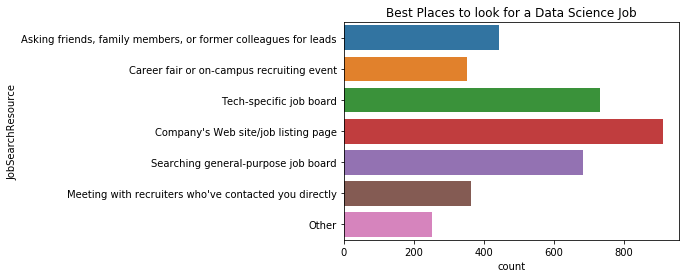

In [107]:
plt.title("Best Places to look for a Data Science Job")
sns.countplot(y='JobSearchResource', data=mcr)

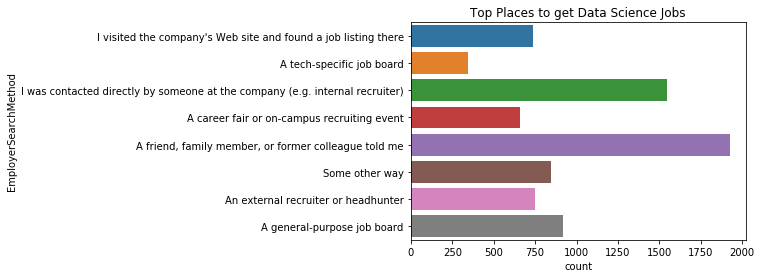

In [108]:
plt.title("Top Places to get Data Science Jobs")
sns.countplot(y='EmployerSearchMethod', data=mcr)

#### 한국

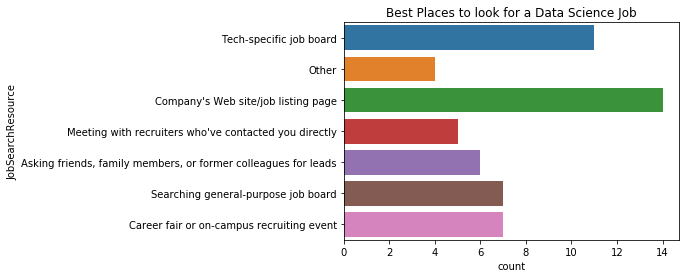

In [109]:
plt.title("Best Places to look for a Data Science Job")
sns.countplot(y='JobSearchResource', data=korea)

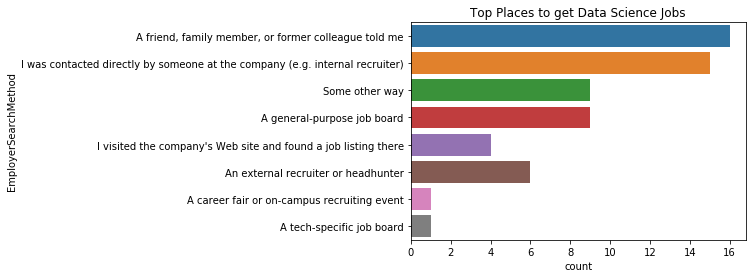

In [110]:
plt.title("Top Places to get Data Science Jobs")
sns.countplot(y='EmployerSearchMethod', data=korea)